In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)}); # you can change this if needed

In [3]:
df = pd.read_csv('/kaggle/input/musictrain/train_music.csv', sep=',')
df.head().T #transpose because there are a lot of features

,0,1,2,3,4
id,4.810491e+10,4.851497e+09,4.877823e+09,4.830184e+09,4.810394e+10
target,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
device_type,7.000000e+00,4.000000e+00,7.000000e+00,7.000000e+00,4.000000e+00
manufacturer_category,1.514000e+03,8.960000e+02,5.920000e+02,1.756000e+03,1.057000e+03
os_category,3.000000e+00,2.800000e+01,3.000000e+00,3.000000e+00,2.800000e+01
...,...,...,...,...,...
income_brnd_cont_m3,NaN,NaN,NaN,NaN,NaN
data_type_1_m3,NaN,NaN,NaN,NaN,NaN
data_type_2_m3,1.376232e+04,NaN,NaN,NaN,NaN
data_type_3_m3,1.292469e+03,5.340576e-05,9.765625e-04,6.680489e-03,2.487183e-03


The goal is to predict whether the user will download the application or no. Hence, this is the problem of binary classification.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 461 entries, id to service_9_flag_m3
dtypes: float64(452), int64(9)
memory usage: 246.2 MB


In [6]:
df.isnull().sum()#Look how many nulls are in each column

id                           0
target                       0
device_type                  0
manufacturer_category        0
os_category                  0
                         ...  
income_brnd_cont_m3      60767
data_type_1_m3           61970
data_type_2_m3           25618
data_type_3_m3           20028
service_9_flag_m3        66351
Length: 461, dtype: int64

In [7]:
#delete columns where the number of non-empty elements less than 50000
df.dropna(axis=1, thresh=50000, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 381 entries, id to service_8_count_m3
dtypes: float64(372), int64(9)
memory usage: 203.5 MB


In [8]:
#delete rows where the number of non-empty elements less than 250
df.dropna(axis=0, thresh=250, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66985 entries, 0 to 69999
Columns: 381 entries, id to service_8_count_m3
dtypes: float64(372), int64(9)
memory usage: 195.2 MB


In [9]:
df.isnull().sum()#Look now how many nan we have

id                          0
target                      0
device_type                 0
manufacturer_category       0
os_category                 0
                         ... 
service_5_count_m3          0
service_6_count_m3          0
service_7_cost_m3        1420
service_7_flag_m3        1420
service_8_count_m3       1420
Length: 381, dtype: int64

In [10]:
df1 = df.fillna(0)
df1

,id,target,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,...,sms_onnet_out_pack_count_m3,sms_omo_out_pack_count_m3,sms_roam_out_count_m3,sms_roam_in_count_m3,content_count_m3,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3
0,48104912810,0,7,1514,3,1.0,0,0.496508,0,299.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4851497268,0,4,896,28,1.0,0,0.881540,0,189.0,...,0.0,0.0,0.0,0.0,21.0,11.0,0.0,0.0,0.0,0.0
2,4877823097,0,7,592,3,2.0,0,0.811192,0,347.0,...,0.0,0.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0
3,4830183791,0,7,1756,3,2.0,0,0.928449,1,343.0,...,0.0,0.0,0.0,0.0,16.0,66.0,0.0,0.0,0.0,0.0
4,48103940036,0,4,1057,28,1.0,0,0.578654,0,355.0,...,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,4819141039,0,7,812,3,2.0,0,0.963514,0,357.0,...,0.0,0.0,0.0,0.0,108.0,65.0,0.0,0.0,0.0,0.0
69996,4888452526,0,7,1057,3,1.0,1,0.777850,0,364.0,...,0.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0
69997,4812460312,0,7,745,3,2.0,0,0.980984,0,363.0,...,0.0,0.0,0.0,0.0,32.0,54.0,0.0,0.0,0.0,0.0
69998,4890036665,0,7,56,3,1.0,0,0.770969,0,341.0,...,0.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df1.isnull().sum()# All the nan have been replaced by zeroes

id                       0
target                   0
device_type              0
manufacturer_category    0
os_category              0
                        ..
service_5_count_m3       0
service_6_count_m3       0
service_7_cost_m3        0
service_7_flag_m3        0
service_8_count_m3       0
Length: 381, dtype: int64

In [12]:
arr = df1.corr()['target']#calculate correlation between all the features and the target feature

In [13]:
for i in arr:
    print(i)

0.15244007364845222
1.0
0.024297807524607612
0.0036387019419602913
-0.042626910101756926
-0.003740365222275377
-0.03599389317958241
-0.19766711408105345
-0.02601904061399409
0.0037133267223403658
-0.0318614093940681
-0.04177360156335644
nan
-0.03341786137593348
-0.04087889060854527
-0.026090560611068972
-0.022848409699047282
0.008997620854120987
nan
-0.0051464356430494535
0.001520884596459292
-0.028340787174446613
-0.022785041167304315
-0.048605091131991164
-0.01609902394985668
-0.004040896435487922
-0.009432367482527496
-0.010582662684337028
0.0024247523405553106
-0.012262845245976022
0.005667179842417681
-0.010705710178248997
-0.0153942717765472
-0.029121159433363054
0.0006539737702249491
0.006202677758597003
nan
-0.03282898371122669
-0.02509403324398683
-0.0184755233941666
-0.0066299182468689535
0.056612969103907465
0.04679681277359605
-0.0036762423414020426
0.013865340320197454
-0.0007231992410005546
0.04502480328038322
-0.016859898973500938
-0.02458300333724329
0.01114243764810406

Some correlations give us nan. It may happen if the column is full of zeroes. Delete null columns

In [14]:
# df2 != 0 - a boolean value that is true if df2 is not equal to zero
# (df2 != 0).any(axis=0) - the number of columns with non-zero entries
# any - aggregates values along the rows into a single boolean value, i.e.,
# resulting in one yes/no value for each column
# df2.loc - selects these columns

df1 = df1.loc[:, (df1 != 0).any(axis=0)]#delete null columns
df1

,id,target,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,...,sms_out_count_m3,sms_in_count_m3,sms_onnet_out_pack_count_m3,sms_omo_out_pack_count_m3,sms_roam_out_count_m3,content_count_m3,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3
0,48104912810,0,7,1514,3,1.0,0,0.496508,0,299.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4851497268,0,4,896,28,1.0,0,0.881540,0,189.0,...,0.0,6.0,0.0,0.0,0.0,21.0,11.0,0.0,0.0,0.0
2,4877823097,0,7,592,3,2.0,0,0.811192,0,347.0,...,1.0,32.0,0.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0
3,4830183791,0,7,1756,3,2.0,0,0.928449,1,343.0,...,3.0,62.0,0.0,0.0,0.0,16.0,66.0,0.0,0.0,0.0
4,48103940036,0,4,1057,28,1.0,0,0.578654,0,355.0,...,0.0,72.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,4819141039,0,7,812,3,2.0,0,0.963514,0,357.0,...,17.0,27.0,0.0,0.0,0.0,108.0,65.0,0.0,0.0,0.0
69996,4888452526,0,7,1057,3,1.0,1,0.777850,0,364.0,...,3.0,4.0,0.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0
69997,4812460312,0,7,745,3,2.0,0,0.980984,0,363.0,...,3.0,7.0,0.0,0.0,0.0,32.0,54.0,0.0,0.0,0.0
69998,4890036665,0,7,56,3,1.0,0,0.770969,0,341.0,...,1.0,4.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0


In [15]:
arr1 = df1.corr()['target']#Let's recalculate the correlation once again after removing all zero columns.
print(len(arr1))
#Compute the length of the resulting array. This will be needed when counting columns with low correlation.

368


In [16]:
type(arr1)
#As we can see, we obtained a series data type. 
#Let's convert it to a list for easy addition to our dataset.

pandas.core.series.Series

In [17]:
arr_final=arr1.tolist()#Convert to a list for easier addition to the dataset.
print(type(arr_final))

<class 'list'>


In [18]:
df1.loc['70000']=arr_final#Add correlation values as the last row.

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [19]:
df1

,id,target,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,...,sms_out_count_m3,sms_in_count_m3,sms_onnet_out_pack_count_m3,sms_omo_out_pack_count_m3,sms_roam_out_count_m3,content_count_m3,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3
0,4.810491e+10,0.0,7.000000,1514.000000,3.000000,1.00000,0.000000,0.496508,0.000000,299.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4.851497e+09,0.0,4.000000,896.000000,28.000000,1.00000,0.000000,0.881540,0.000000,189.000000,...,0.000000,6.000000,0.000000,0.000000,0.000000,21.000000,11.000000,0.000000,0.000000,0.000000
2,4.877823e+09,0.0,7.000000,592.000000,3.000000,2.00000,0.000000,0.811192,0.000000,347.000000,...,1.000000,32.000000,0.000000,0.000000,0.000000,74.000000,0.000000,0.000000,0.000000,0.000000
3,4.830184e+09,0.0,7.000000,1756.000000,3.000000,2.00000,0.000000,0.928449,1.000000,343.000000,...,3.000000,62.000000,0.000000,0.000000,0.000000,16.000000,66.000000,0.000000,0.000000,0.000000
4,4.810394e+10,0.0,4.000000,1057.000000,28.000000,1.00000,0.000000,0.578654,0.000000,355.000000,...,0.000000,72.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69996,4.888453e+09,0.0,7.000000,1057.000000,3.000000,1.00000,1.000000,0.777850,0.000000,364.000000,...,3.000000,4.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000
69997,4.812460e+09,0.0,7.000000,745.000000,3.000000,2.00000,0.000000,0.980984,0.000000,363.000000,...,3.000000,7.000000,0.000000,0.000000,0.000000,32.000000,54.000000,0.000000,0.000000,0.000000
69998,4.890037e+09,0.0,7.000000,56.000000,3.000000,1.00000,0.000000,0.770969,0.000000,341.000000,...,1.000000,4.000000,0.000000,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000
69999,4.812920e+09,0.0,7.000000,69.000000,27.000000,1.00000,0.000000,0.951170,0.000000,364.000000,...,1.000000,80.000000,0.000000,0.000000,0.000000,161.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
df1.dropna(axis=1, how='any', inplace=True)#Remove columns with NaN correlation.
df1

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,id,target,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,...,sms_out_count_m3,sms_in_count_m3,sms_onnet_out_pack_count_m3,sms_omo_out_pack_count_m3,sms_roam_out_count_m3,content_count_m3,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3
0,4.810491e+10,0.0,7.000000,1514.000000,3.000000,1.00000,0.000000,0.496508,0.000000,299.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4.851497e+09,0.0,4.000000,896.000000,28.000000,1.00000,0.000000,0.881540,0.000000,189.000000,...,0.000000,6.000000,0.000000,0.000000,0.000000,21.000000,11.000000,0.000000,0.000000,0.000000
2,4.877823e+09,0.0,7.000000,592.000000,3.000000,2.00000,0.000000,0.811192,0.000000,347.000000,...,1.000000,32.000000,0.000000,0.000000,0.000000,74.000000,0.000000,0.000000,0.000000,0.000000
3,4.830184e+09,0.0,7.000000,1756.000000,3.000000,2.00000,0.000000,0.928449,1.000000,343.000000,...,3.000000,62.000000,0.000000,0.000000,0.000000,16.000000,66.000000,0.000000,0.000000,0.000000
4,4.810394e+10,0.0,4.000000,1057.000000,28.000000,1.00000,0.000000,0.578654,0.000000,355.000000,...,0.000000,72.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69996,4.888453e+09,0.0,7.000000,1057.000000,3.000000,1.00000,1.000000,0.777850,0.000000,364.000000,...,3.000000,4.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000
69997,4.812460e+09,0.0,7.000000,745.000000,3.000000,2.00000,0.000000,0.980984,0.000000,363.000000,...,3.000000,7.000000,0.000000,0.000000,0.000000,32.000000,54.000000,0.000000,0.000000,0.000000
69998,4.890037e+09,0.0,7.000000,56.000000,3.000000,1.00000,0.000000,0.770969,0.000000,341.000000,...,1.000000,4.000000,0.000000,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000
69999,4.812920e+09,0.0,7.000000,69.000000,27.000000,1.00000,0.000000,0.951170,0.000000,364.000000,...,1.000000,80.000000,0.000000,0.000000,0.000000,161.000000,0.000000,0.000000,0.000000,0.000000


In [22]:
df_sorted = df1.sort_values(by=df1.index[-1], ascending=True, axis=1)
#Sort the dataset columns based on the values of the last row, i.e., the correlation values.
df_sorted

,lt,count_sms_source_5,voice_onnet_out_day_work_dur_m3,os_category,voice_onnet_in_day_work_dur_m3,service_1_count,is_obl_center,voice_onnet_out_day_work_dur_m2,voice_onnet_out_day_work_count_m3,tp_flag,...,paym_count_m2,paym_el_count_m1,data_type_2_m1,all_cost_m1,paym_count_m1,content_count_m2,content_count_m3,content_count_m1,id,target
0,0.496508,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,218.310578,43.920800,0.000000,31.000000,0.000000,23.000000,4.810491e+10,0.0
1,0.881540,1.000000,60.000000,28.000000,125.000000,58.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,21.000000,30.000000,4.851497e+09,0.0
2,0.811192,1.000000,780.000000,3.000000,3946.000000,0.000000,0.000000,1920.000000,10.000000,0.000000,...,2.000000,2.000000,3557.724354,29.823000,2.000000,59.000000,74.000000,52.000000,4.877823e+09,0.0
3,0.928449,1.000000,8160.000000,3.000000,10717.000000,418.000000,1.000000,5160.000000,49.000000,0.000000,...,2.000000,1.000000,0.000000,28.399800,1.000000,23.000000,16.000000,32.000000,4.830184e+09,0.0
4,0.578654,0.000000,27600.000000,28.000000,13158.000000,0.000000,1.000000,19740.000000,252.000000,0.000000,...,2.000000,1.000000,0.000000,25.881700,1.000000,82.000000,70.000000,65.000000,4.810394e+10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69996,0.777850,1.000000,4920.000000,3.000000,3924.000000,0.000000,0.000000,3300.000000,26.000000,1.000000,...,1.000000,2.000000,0.000000,70.587100,2.000000,42.000000,31.000000,41.000000,4.888453e+09,0.0
69997,0.980984,1.000000,3120.000000,3.000000,1531.000000,198.000000,1.000000,1860.000000,24.000000,0.000000,...,0.000000,1.000000,0.000000,43.921400,1.000000,52.000000,32.000000,51.000000,4.812460e+09,0.0
69998,0.770969,0.000000,2520.000000,3.000000,1246.000000,0.000000,0.000000,3240.000000,34.000000,0.000000,...,2.000000,1.000000,2244.925154,47.058800,1.000000,54.000000,34.000000,36.000000,4.890037e+09,0.0
69999,0.951170,4.000000,16260.000000,27.000000,8109.000000,0.000000,0.000000,15300.000000,198.000000,0.000000,...,10.000000,4.000000,187.856458,89.803800,4.000000,265.000000,161.000000,273.000000,4.812920e+09,0.0


In [23]:
# Now, let's sort the initially obtained array of correlations to determine from which column to remove part of the table
arrn = sorted(arr_final)#sort array
arrn.pop(-4)#delete nan from correlation array
arrn.pop(-4)
tmp=0 #Let's create a variable to count the remaining columns.
arr_new = sorted(arrn)
for i in range(0, 355, 1): #Iterate through the total number of columns
    if arr_new[i]>0.02: #and count the number of "important columns"."
        tmp+=1
#print(tmp)
#print(arr_new[210])

In [24]:
for i in range(0, 266, 1):
    df_new = df_sorted.drop(df_sorted.columns[:i], axis=1)
df_new
#Remove columns with correlation less than 0.02 from the sorted dataset.

,voice_omo_in_day_rest_count_m3,service_6_count_m1,voice_omo_in_day_rest_count_m2,voice_omo_out_night_rest_dur_m3,service_6_count_m2,all_count_m2,voice_omo_out_cost_m2,voice_onnet_out_night_work_cost_m1,voice_omo_out_night_work_dur_m3,sms_out_count_m1,...,paym_count_m2,paym_el_count_m1,data_type_2_m1,all_cost_m1,paym_count_m1,content_count_m2,content_count_m3,content_count_m1,id,target
0,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,218.310578,43.920800,0.000000,31.000000,0.000000,23.000000,4.810491e+10,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,1.176400,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,21.000000,30.000000,4.851497e+09,0.0
2,1.000000,0.000000,1.000000,0.000000,0.000000,238.000000,1.724800,2.352900,660.000000,1.000000,...,2.000000,2.000000,3557.724354,29.823000,2.000000,59.000000,74.000000,52.000000,4.877823e+09,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,0.000000,0.000000,0.000000,4.000000,...,2.000000,1.000000,0.000000,28.399800,1.000000,23.000000,16.000000,32.000000,4.830184e+09,0.0
4,4.000000,0.000000,1.000000,0.000000,0.000000,1168.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,0.000000,25.881700,1.000000,82.000000,70.000000,65.000000,4.810394e+10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69996,0.000000,0.000000,0.000000,0.000000,0.000000,128.000000,0.000000,3.921500,0.000000,7.000000,...,1.000000,2.000000,0.000000,70.587100,2.000000,42.000000,31.000000,41.000000,4.888453e+09,0.0
69997,0.000000,0.000000,0.000000,0.000000,1.000000,98.000000,0.000000,0.000000,0.000000,4.000000,...,0.000000,1.000000,0.000000,43.921400,1.000000,52.000000,32.000000,51.000000,4.812460e+09,0.0
69998,0.000000,0.000000,0.000000,0.000000,0.000000,336.000000,0.000000,0.000000,0.000000,1.000000,...,2.000000,1.000000,2244.925154,47.058800,1.000000,54.000000,34.000000,36.000000,4.890037e+09,0.0
69999,0.000000,0.000000,7.000000,0.000000,0.000000,1234.000000,14.903000,11.764500,960.000000,2.000000,...,10.000000,4.000000,187.856458,89.803800,4.000000,265.000000,161.000000,273.000000,4.812920e+09,0.0


In [25]:
df_new1 = df_new.drop('70000') 
df_new1
#Remove the row with correlations since it is no longer needed.

,voice_omo_in_day_rest_count_m3,service_6_count_m1,voice_omo_in_day_rest_count_m2,voice_omo_out_night_rest_dur_m3,service_6_count_m2,all_count_m2,voice_omo_out_cost_m2,voice_onnet_out_night_work_cost_m1,voice_omo_out_night_work_dur_m3,sms_out_count_m1,...,paym_count_m2,paym_el_count_m1,data_type_2_m1,all_cost_m1,paym_count_m1,content_count_m2,content_count_m3,content_count_m1,id,target
0,0.0,0.0,0.0,0.0,0.0,137.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,218.310578,43.9208,0.0,31.0,0.0,23.0,4.810491e+10,0.0
1,0.0,0.0,0.0,0.0,0.0,32.0,1.1764,0.0000,0.0,0.0,...,0.0,0.0,0.000000,0.0000,0.0,28.0,21.0,30.0,4.851497e+09,0.0
2,1.0,0.0,1.0,0.0,0.0,238.0,1.7248,2.3529,660.0,1.0,...,2.0,2.0,3557.724354,29.8230,2.0,59.0,74.0,52.0,4.877823e+09,0.0
3,0.0,0.0,0.0,0.0,0.0,157.0,0.0000,0.0000,0.0,4.0,...,2.0,1.0,0.000000,28.3998,1.0,23.0,16.0,32.0,4.830184e+09,0.0
4,4.0,0.0,1.0,0.0,0.0,1168.0,0.0000,0.0000,0.0,0.0,...,2.0,1.0,0.000000,25.8817,1.0,82.0,70.0,65.0,4.810394e+10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,681.0,0.0000,0.0000,0.0,62.0,...,3.0,1.0,555.004056,50.5877,1.0,129.0,108.0,138.0,4.819141e+09,0.0
69996,0.0,0.0,0.0,0.0,0.0,128.0,0.0000,3.9215,0.0,7.0,...,1.0,2.0,0.000000,70.5871,2.0,42.0,31.0,41.0,4.888453e+09,0.0
69997,0.0,0.0,0.0,0.0,1.0,98.0,0.0000,0.0000,0.0,4.0,...,0.0,1.0,0.000000,43.9214,1.0,52.0,32.0,51.0,4.812460e+09,0.0
69998,0.0,0.0,0.0,0.0,0.0,336.0,0.0000,0.0000,0.0,1.0,...,2.0,1.0,2244.925154,47.0588,1.0,54.0,34.0,36.0,4.890037e+09,0.0


In [26]:
corr_matrix = df_new1.corr()#Create a correlation matrix.

# Select the upper triangle of the matrix.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Identify features with a correlation greater than 0.95.
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Remove these features.
df_new2 = df_new1.drop(to_drop, axis=1)
df_new2

,voice_omo_in_day_rest_count_m3,service_6_count_m1,voice_omo_in_day_rest_count_m2,voice_omo_out_night_rest_dur_m3,service_6_count_m2,all_count_m2,voice_omo_out_cost_m2,voice_onnet_out_night_work_cost_m1,voice_omo_out_night_work_dur_m3,sms_out_count_m1,...,all_cost_m2,data_type_3_m1,paym_el_count_m1,data_type_2_m1,all_cost_m1,content_count_m2,content_count_m3,content_count_m1,id,target
0,0.0,0.0,0.0,0.0,0.0,137.0,0.0000,0.0000,0.0,0.0,...,21.9604,0.023283,0.0,218.310578,43.9208,31.0,0.0,23.0,4.810491e+10,0.0
1,0.0,0.0,0.0,0.0,0.0,32.0,1.1764,0.0000,0.0,0.0,...,1.1764,0.000000,0.0,0.000000,0.0000,28.0,21.0,30.0,4.851497e+09,0.0
2,1.0,0.0,1.0,0.0,0.0,238.0,1.7248,2.3529,660.0,1.0,...,42.5966,103.749401,2.0,3557.724354,29.8230,59.0,74.0,52.0,4.877823e+09,0.0
3,0.0,0.0,0.0,0.0,0.0,157.0,0.0000,0.0000,0.0,4.0,...,27.6155,0.000000,1.0,0.000000,28.3998,23.0,16.0,32.0,4.830184e+09,0.0
4,4.0,0.0,1.0,0.0,0.0,1168.0,0.0000,0.0000,0.0,0.0,...,46.6658,0.005238,1.0,0.000000,25.8817,82.0,70.0,65.0,4.810394e+10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,681.0,0.0000,0.0000,0.0,62.0,...,47.0588,24.243153,1.0,555.004056,50.5877,129.0,108.0,138.0,4.819141e+09,0.0
69996,0.0,0.0,0.0,0.0,0.0,128.0,0.0000,3.9215,0.0,7.0,...,0.0000,0.000000,2.0,0.000000,70.5871,42.0,31.0,41.0,4.888453e+09,0.0
69997,0.0,0.0,0.0,0.0,1.0,98.0,0.0000,0.0000,0.0,4.0,...,0.0000,0.000000,1.0,0.000000,43.9214,52.0,32.0,51.0,4.812460e+09,0.0
69998,0.0,0.0,0.0,0.0,0.0,336.0,0.0000,0.0000,0.0,1.0,...,90.1960,25.277548,1.0,2244.925154,47.0588,54.0,34.0,36.0,4.890037e+09,0.0


In [27]:
df_new3 = df_new2.drop('id', axis = 1)#Remove the index column as it holds no value.
df_new3

,voice_omo_in_day_rest_count_m3,service_6_count_m1,voice_omo_in_day_rest_count_m2,voice_omo_out_night_rest_dur_m3,service_6_count_m2,all_count_m2,voice_omo_out_cost_m2,voice_onnet_out_night_work_cost_m1,voice_omo_out_night_work_dur_m3,sms_out_count_m1,...,all_home_clc_m2,all_cost_m2,data_type_3_m1,paym_el_count_m1,data_type_2_m1,all_cost_m1,content_count_m2,content_count_m3,content_count_m1,target
0,0.0,0.0,0.0,0.0,0.0,137.0,0.0000,0.0000,0.0,0.0,...,0.0000,21.9604,0.023283,0.0,218.310578,43.9208,31.0,0.0,23.0,0.0
1,0.0,0.0,0.0,0.0,0.0,32.0,1.1764,0.0000,0.0,0.0,...,1.1764,1.1764,0.000000,0.0,0.000000,0.0000,28.0,21.0,30.0,0.0
2,1.0,0.0,1.0,0.0,0.0,238.0,1.7248,2.3529,660.0,1.0,...,13.6461,42.5966,103.749401,2.0,3557.724354,29.8230,59.0,74.0,52.0,0.0
3,0.0,0.0,0.0,0.0,0.0,157.0,0.0000,0.0000,0.0,4.0,...,2.5176,27.6155,0.000000,1.0,0.000000,28.3998,23.0,16.0,32.0,0.0
4,4.0,0.0,1.0,0.0,0.0,1168.0,0.0000,0.0000,0.0,0.0,...,8.2345,46.6658,0.005238,1.0,0.000000,25.8817,82.0,70.0,65.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,681.0,0.0000,0.0000,0.0,62.0,...,0.0000,47.0588,24.243153,1.0,555.004056,50.5877,129.0,108.0,138.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,128.0,0.0000,3.9215,0.0,7.0,...,0.0000,0.0000,0.000000,2.0,0.000000,70.5871,42.0,31.0,41.0,0.0
69997,0.0,0.0,0.0,0.0,1.0,98.0,0.0000,0.0000,0.0,4.0,...,0.0000,0.0000,0.000000,1.0,0.000000,43.9214,52.0,32.0,51.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,336.0,0.0000,0.0000,0.0,1.0,...,0.0000,90.1960,25.277548,1.0,2244.925154,47.0588,54.0,34.0,36.0,0.0


In [28]:
df_final=df_new3.sample(n=10000, random_state=42)#Select 10,000 rows for ease of working with the array.
df_final

,voice_omo_in_day_rest_count_m3,service_6_count_m1,voice_omo_in_day_rest_count_m2,voice_omo_out_night_rest_dur_m3,service_6_count_m2,all_count_m2,voice_omo_out_cost_m2,voice_onnet_out_night_work_cost_m1,voice_omo_out_night_work_dur_m3,sms_out_count_m1,...,all_home_clc_m2,all_cost_m2,data_type_3_m1,paym_el_count_m1,data_type_2_m1,all_cost_m1,content_count_m2,content_count_m3,content_count_m1,target
58448,0.0,0.0,2.0,0.0,0.0,469.0,0.0000,3.9215,0.0,6.0,...,0.0000,3.9215,466.493528,1.0,2309.685785,31.0270,85.0,69.0,70.0,0.0
42185,0.0,0.0,0.0,0.0,0.0,80.0,0.0000,0.0000,0.0,0.0,...,6.7449,89.0977,0.000000,1.0,0.000000,8.6270,37.0,31.0,20.0,0.0
22479,1.0,0.0,0.0,0.0,0.0,113.0,0.0000,0.0000,0.0,1.0,...,0.0000,0.0000,367.896420,1.0,1459.259577,3.9216,50.0,47.0,50.0,0.0
39290,6.0,0.0,14.0,60.0,0.0,763.0,14.0871,0.0000,360.0,7.0,...,14.0871,142.7148,779.592412,6.0,1747.196139,87.0276,101.0,51.0,69.0,0.0
39974,4.0,0.0,10.0,840.0,0.0,888.0,1.1763,0.0000,900.0,22.0,...,1.1763,1.1763,0.399587,1.0,5917.894601,74.8986,283.0,291.0,308.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25059,0.0,1.0,0.0,0.0,1.0,126.0,0.0000,0.0000,0.0,2.0,...,0.0000,43.1372,132.413796,3.0,324.264423,113.7254,8.0,27.0,35.0,0.0
35242,3.0,0.0,3.0,0.0,0.0,767.0,0.0000,0.0000,420.0,5.0,...,0.0000,0.0000,618.875447,0.0,605.809043,0.0000,41.0,58.0,53.0,0.0
6214,2.0,0.0,5.0,300.0,0.0,1777.0,4.7060,0.0000,1620.0,9.0,...,14.9021,50.5884,109.051967,1.0,7706.576058,45.0982,60.0,64.0,52.0,0.0
53554,1.0,0.0,0.0,0.0,0.0,2692.0,0.0000,0.0000,60.0,17.0,...,6.2745,172.5489,340.978172,4.0,695.245872,90.9803,55.0,65.0,82.0,0.0


We have obtained the final dataset with "clean" data. Now, we can start using algorithms, but before that, let's explore the dataset features and their relationships in more detail.

In [29]:
print(df_final.columns.tolist())
#Display the list of remaining columns for manual analysis of their relevance.

['voice_omo_in_day_rest_count_m3', 'service_6_count_m1', 'voice_omo_in_day_rest_count_m2', 'voice_omo_out_night_rest_dur_m3', 'service_6_count_m2', 'all_count_m2', 'voice_omo_out_cost_m2', 'voice_onnet_out_night_work_cost_m1', 'voice_omo_out_night_work_dur_m3', 'sms_out_count_m1', 'voice_omo_out_night_rest_cost_m3', 'com_num_cost_m3', 'voice_onnet_in_night_work_count_m1', 'voice_omo_out_cost_m1', 'paym_el_sum_m3', 'voice_omo_out_dur_m1', 'voice_omo_out_dur_m2', 'voice_onnet_out_night_work_cost_m3', 'voice_omo_out_day_rest_count_m3', 'voice_omo_out_count_m3', 'voice_omo_out_day_rest_cost_m2', 'voice_onnet_in_night_rest_count_m1', 'voice_omo_out_night_work_dur_m2', 'device_type', 'sms_cost_m2', 'sms_out_count_m3', 'voice_omo_out_night_rest_cost_m2', 'paym_el_sum_m2', 'all_count_m1', 'voice_omo_out_night_rest_dur_m2', 'voice_omo_out_day_rest_dur_m2', 'voice_omo_in_day_rest_count_m1', 'com_num_cost_m2', 'voice_omo_out_day_rest_cost_m1', 'content_cost_m2', 'voice_omo_out_night_work_dur_m1',

"Important" columns are considered those related to the cost of operator services, the quantity, duration, and cost of SMS and calls from different operators. This is quite logical, as predicting whether a user will download an application from Vodafone depends on whether the person uses services from other operators, and if so, which ones and how often.

On the other hand, features such as the type of smartphone or operating system have no impact on the target variable. Indeed, a user can install the application with any phone and operating system.

Let's examine the time of day and days when the highest number of calls from other operators occurs.

<Figure size 720x576 with 0 Axes>

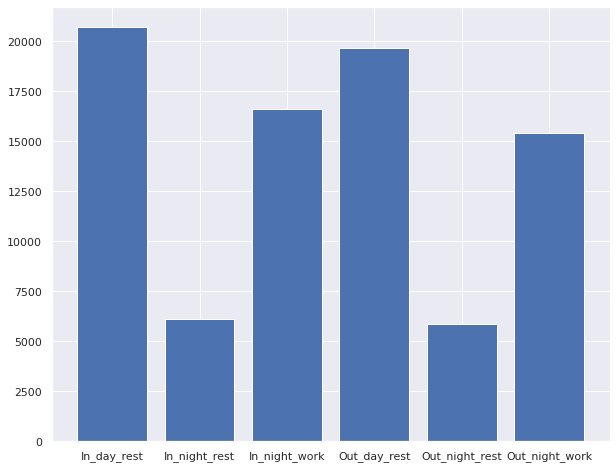

In [30]:
array=[]

#Calculate the total number of incoming and outgoing calls at different times of the day.
#from other operators

array.append(df_final['voice_omo_in_day_rest_count_m3'].sum())
array.append(df_final['voice_omo_in_night_rest_count_m3'].sum())
array.append(df_final['voice_omo_in_night_work_count_m3'].sum())
array.append(df_final['voice_omo_out_day_rest_count_m3'].sum())
array.append(df_final['voice_omo_out_night_rest_count_m3'].sum())
array.append(df_final['voice_omo_out_night_work_count_m3'].sum())

array1=['In_day_rest','In_night_rest', 'In_night_work', 'Out_day_rest', 'Out_night_rest', 'Out_night_work'] 

fig=plt.figure()
fig,ax=plt.subplots()
ax.bar(array1,array)
plt.show()

As we can see, the highest number of calls occurs during daytime on weekends and evenings on weekdays.

Let's examine the relationship between the total cost of all operator services and, for example, the number of outgoing SMS.

In [31]:
from scipy.stats import pearsonr, spearmanr, kendalltau
r = pearsonr(df_final['all_cost_m3'], df_final['sms_out_count_m2'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

# The correlation between the cost of operator services and the number of outgoing SMS is statistically significant because p-value < 0.05.

Pearson correlation: 0.17283226035914717 p-value: 6.661570016478679e-68


Let's explore the relationship between the total cost of services and the duration of outgoing calls.

In [32]:
from scipy.stats import pearsonr, spearmanr, kendalltau
r = pearsonr(df_final['all_cost_m3'], df_final['voice_omo_out_dur_m1'])
print('Pearson correlation:', r[0], 'p-value:', r[1])

# As for the relationship between the total cost of services and the number of outgoing calls, the situation is similar.

Pearson correlation: 0.2779972944340726 p-value: 6.8571458591028585e-177


Now, having gained some understanding of the dataset and the task at hand, we can move on to building models.

In [33]:
#Separate the target from the main part and see what it represents.
df_X = df_final.drop('target', axis=1)# Unscaled X
y = df_final['target']#target

In [34]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df_X) #Create X and scale the data.

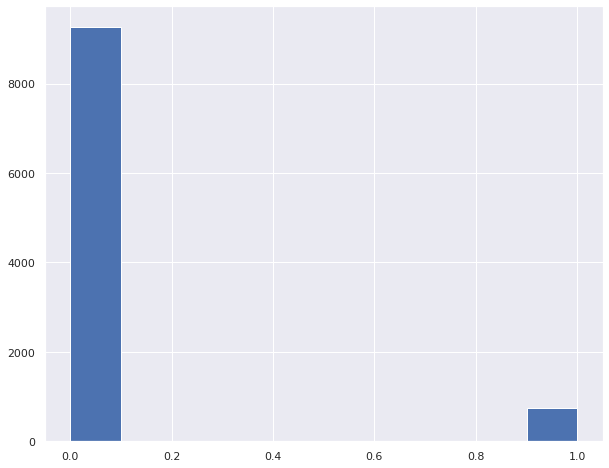

In [35]:
y.hist();#As we can see, the classes are not balanced, which can significantly hinder working with algorithms.

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

In [37]:
from imblearn.over_sampling import RandomOverSampler

# Artificially add objects of class 1.
ros = RandomOverSampler() # Method for balancing classes.
X_ros, y_ros = ros.fit_resample(X_train, y_train) # Reallocate the sample.

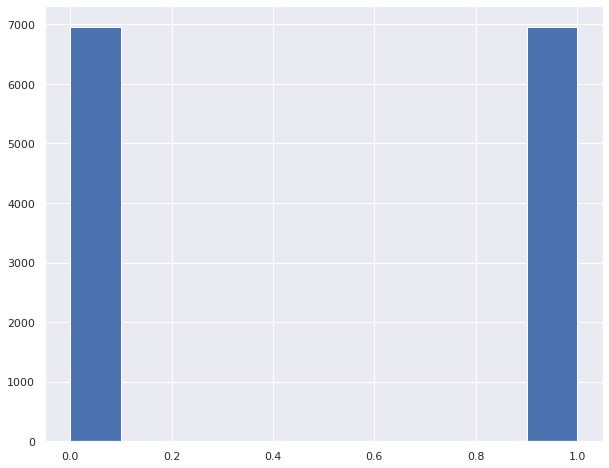

In [38]:
y_ros.hist();#As we can see, the classes are now balanced.

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_ros, y_ros)
y_pred = knn.predict(X_valid)

In [40]:
from sklearn.model_selection import GridSearchCV

knn_params={'n_neighbors': np.arange(1, 20, 2)} # Parameter dictionary (key: set of possible values)

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy', n_jobs=-1) #  5-fold cross-validation
knn_grid.fit(X_ros, y_ros)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
             scoring='accuracy')

In [41]:
# Look at the best parameter values.
print(knn_grid.best_params_)

#best model
print(knn_grid.best_estimator_)

{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


In [43]:
y_pred = knn_grid.best_estimator_.predict(X_valid) # prediction of the best model

In [47]:
#Function for constructing the validation curve.
# On the x-axis --- hyperparameter values (param_***)
# On the y-axis --- metric values (mean_test_score)
def plot_validation_curve(model_grid, param_name, params = None) :
    results_df = pd.DataFrame(model_grid.cv_results_)
    if params == None :
        plt.plot(results_df['param_' + param_name], results_df['mean_test_score'])
    else :
        plt.plot(params, results_df['mean_test_score'])
    plt.xlabel(param_name) 
    plt.ylabel('Test F1 score') 
    plt.title('Validation curve') 
    plt.show() 

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Function to evaluate results.
def print_results(model, X_valid, y_true, y_pred):
    print('Accuracy:', accuracy_score(y_true, y_pred)) # Accuracy - the proportion of correct algorithm predictions.
    print('Precision:', precision_score(y_true, y_pred)) # Precision - the proportion of objects classified as positive by the classifier that are truly positive.
    print('Recall:', recall_score(y_true, y_pred)) # It shows the fraction of positive class objects found by the algorithm among all positive class objects.
# Recall demonstrates the algorithm's ability to detect the given class in general, while precision indicates its ability to distinguish this class from other classes.
    print('F1 score:', f1_score(y_true, y_pred)) # F1 score - the harmonic mean of precision and recall.
    print('Roc Auc:', roc_auc_score(y_true, y_pred)) # Area Under Curve (AUC) - the area under the error curve.
    print('Confusion_matrix:\n', confusion_matrix(y_true, y_pred)) # Table with 4 different combinations of predicted and actual values.
    plot_confusion_matrix(model, X_valid, y_true, values_format = '5g') # Visualize the confusion_matrix evaluation.
    plt.show() 

Achieved a very good result, accuracy=0.8. Other metrics gave slightly worse results, but this depends on the specific characteristics of each metric.